In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import os
from scipy.signal import savgol_filter, chirp, find_peaks, peak_widths
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

now = datetime.now()
dt_string = now.strftime("%Y/%m/%d %H:%M:%S")
print("Last update =", dt_string)	

#path names-win
path_1 = r'./manual-data-may.csv'

#settings
kwargs = dict(header=0, index_col=0, parse_dates=False, squeeze=True)

#import csv files
df1 = pd.read_csv(path_1, **kwargs)

Last update = 2022/05/09 09:09:50


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 141 entries, 1.0 to nan
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   E_Coli     141 non-null    float64
 1   TRC        140 non-null    float64
 2   DO         141 non-null    float64
 3   TSS*       136 non-null    float64
 4   Colour     140 non-null    float64
 5   Turbidity  141 non-null    float64
 6   pH         141 non-null    float64
 7   TON        98 non-null     float64
 8   BOD5       141 non-null    float64
 9   NH3_N      140 non-null    float64
dtypes: float64(10)
memory usage: 12.1 KB


In [36]:
df2 = df1.drop(columns=['E_Coli','Colour'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 141 entries, 1.0 to nan
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TRC        140 non-null    float64
 1   DO         141 non-null    float64
 2   TSS*       136 non-null    float64
 3   Turbidity  141 non-null    float64
 4   pH         141 non-null    float64
 5   TON        98 non-null     float64
 6   BOD5       141 non-null    float64
 7   NH3_N      140 non-null    float64
dtypes: float64(8)
memory usage: 9.9 KB


In [28]:
arr = np.array(df1)
np.shape(arr)
arr_mean = []
arr_std = []
for i in range(10):
    arr_mean.append(np.nanmean(arr[:,i]))
    arr_std.append(np.nanstd(arr[:,i]))

In [38]:
arr2 = np.array(df2)
np.shape(arr2)
arr_mean2 = []
arr_std2 = []
for i in range(8):
    arr_mean2.append(np.nanmean(arr2[:,i]))
    arr_std2.append(np.nanstd(arr2[:,i]))

1.0      0.420000
2.0      0.570000
3.0           NaN
4.0      0.250000
5.0      0.160000
           ...   
137.0    0.120000
138.0    0.030000
139.0    0.030000
140.0    0.030000
NaN      1.479353
Name: NH3_N, Length: 141, dtype: float64

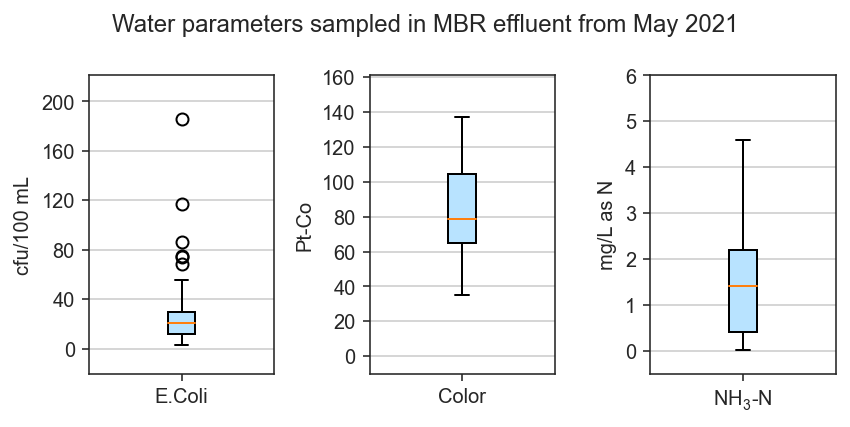

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")
fig, ax = plt.subplots(1, 3, figsize=(6,3))
fig.suptitle('Water parameters sampled in MBR effluent from May 2021')
bplt1 = ax[0].boxplot(df1['E_Coli'],patch_artist=True)
ax[0].set_ylim(-20,221)
ax[0].set_yticks(np.arange(0,220,40))
ax[0].set_ylabel('cfu/100 mL')
bplt2 = ax[1].boxplot(df1['Colour'].dropna(),patch_artist=True)
ax[1].set_ylim(-10,161)
ax[1].set_yticks(np.arange(0,161,20))
ax[1].set_ylabel('Pt-Co')
bplt3 = ax[2].boxplot(df1['NH3_N'].dropna(),patch_artist=True)
ax[2].set_ylim(-0.5,6)
ax[2].set_ylabel('mg/L as N')

color1 = '#B8E3FF'
colors = [color1,color1,color1]
for bplot in (bplt1, bplt2, bplt3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

ax[0].set_xticklabels(['E.Coli'])
ax[1].set_xticklabels(['Color'])
ax[2].set_xticklabels(['NH$_{3}$-N'])
for i in range(3):
    ax[i].margins(x=0.01)
    ax[i].grid(axis='y')

plt.tight_layout()
plt.savefig(r'D:\MPhil-thesis-github-library\MPhil-thesis\Presentation-notes\0511-seminar-pre\water-parameters.png',dpi=300,bbox_inches='tight') 
plt.show()

In [3]:
df1.columns

Index(['E_Coli', 'TRC', 'DO', 'Temp', 'TSS*', 'Colour', 'Turbidity',
       'Turbidity*', 'Turbidity_DSD*', 'pH', 'pH_DSD*', 'BOD5', 'NH3_N',
       'NH3_N*', 'NH3_N_DSD*', 'TON', 'Potassium*', 'Total_P_DSD*',
       'Nitrate_DSD*'],
      dtype='object')